# Introduction

This is the original run through with all raw data for edx Data Science and Machine Learning Capstone Project. 


## Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

## Datasets 

**311 complaint dataset**
* This dataset is available at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9. You can download part of this data by using SODA API.
* Only the data that is related to the Department of Housing Preservation and Development was analyzed

**PLUTO dataset for housing**
* This dataset for housing can be accessed from https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf. 
* Only the data for the borough of interest was imported 

**Borough boundaries geojson**
* Available from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm






# Packages, Data Import and Settings

##Import packages


In [2]:
# Normal data analysis packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

## Options

In [3]:
pd.options.display.max_rows = 200
sns.set_style('whitegrid')

## Data

### Import Pydrive to access Google drive for csv

In [4]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

### Import 311 data 

In [5]:
# id = '########'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('311_Service_Requests_from_2010_to_Present_min.csv')  

df311 = pd.read_csv('311_Service_Requests_from_2010_to_Present_min.csv')

In [6]:
df311.head()

Unnamed: 0  Unique Key            Created Date Closed Date  \
0           0    45531130  02/02/2020 06:09:17 AM         NaN   
1           1    45529784  02/02/2020 02:15:24 PM         NaN   
2           2    45527528  02/02/2020 02:27:41 AM         NaN   
3           3    45530329  02/02/2020 12:13:18 PM         NaN   
4           4    45528814  02/02/2020 01:59:44 PM         NaN   

         Complaint Type         Location Type  Incident Zip  \
0        HEAT/HOT WATER  RESIDENTIAL BUILDING       10019.0   
1  UNSANITARY CONDITION  RESIDENTIAL BUILDING       11204.0   
2        HEAT/HOT WATER  RESIDENTIAL BUILDING       11372.0   
3        HEAT/HOT WATER  RESIDENTIAL BUILDING       10458.0   
4             APPLIANCE  RESIDENTIAL BUILDING       11209.0   

          Incident Address         Street Name Address Type             City  \
0     426 WEST   52 STREET    WEST   52 STREET      ADDRESS         NEW YORK   
1           1751 67 STREET           67 STREET      ADDRESS         BROOKLYN   
2          87-15 37 AVENUE           37 AVENUE      ADDRESS  Jackson Heights   
3  2405 SOUTHERN BOULEVARD  SOUTHERN BOULEVARD      ADDRESS            BRONX   
4            223 78 STREET           78 STREET      ADDRESS         BROOKLYN   

  Status                             Resolution Description    Borough  \
0   Open  The following complaint conditions are still o...  MANHATTAN   
1   Open  The following complaint conditions are still o...   BROOKLYN   
2   Open  The following complaint conditions are still o...     QUEENS   
3   Open  The following complaint conditions are still o...      BRONX   
4   Open  The following complaint conditions are still o...   BROOKLYN   

    Latitude  Longitude  
0  40.765132 -73.988993  
1  40.618484 -73.992673  
2  40.750269 -73.879432  
3  40.853773 -73.881558  
4  40.629745 -74.030533

In [7]:
df311.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              6019843 non-null  int64  
 1   Unique Key              6019843 non-null  int64  
 2   Created Date            6019843 non-null  object 
 3   Closed Date             5893186 non-null  object 
 4   Complaint Type          6019843 non-null  object 
 5   Location Type           5967019 non-null  object 
 6   Incident Zip            5939146 non-null  float64
 7   Incident Address        5967018 non-null  object 
 8   Street Name             5967018 non-null  object 
 9   Address Type            5935078 non-null  object 
 10  City                    5939569 non-null  object 
 11  Status                  6019843 non-null  object 
 12  Resolution Description  6012017 non-null  object 
 13  Borough                 6019843 non-null  object 
 14  La

### Import PLUTO data 

In [8]:
# id = '########'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('BX_18v1.csv') 

dfPLUTO = pd.read_csv('BX_18v1.csv')

/Users/ianreynolds/Desktop/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
dfPLUTO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Borough               89854 non-null  object 
 1   Block                 89854 non-null  int64  
 2   Lot                   89854 non-null  int64  
 3   CD                    89854 non-null  int64  
 4   CT2010                89447 non-null  float64
 5   CB2010                87342 non-null  float64
 6   SchoolDist            89695 non-null  float64
 7   Council               89649 non-null  float64
 8   ZipCode               89525 non-null  float64
 9   FireComp              89568 non-null  object 
 10  PolicePrct            89692 non-null  float64
 11  HealthCenterDistrict  89727 non-null  float64
 12  HealthArea            89630 non-null  float64
 13  SanitBoro             89235 non-null  float64
 14  SanitDistrict         89238 non-null  float64
 15  SanitSub           

###Drop out unnamed column

In [10]:
df311 = df311.drop('Unnamed: 0',axis=1)

### Date -> Datetime

In [11]:
df311['Created DateTime'] = pd.to_datetime(df311['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
df311['Year'] = pd.DatetimeIndex(df311['Created DateTime']).year
df311['Month'] = pd.DatetimeIndex(df311['Created DateTime']).month

# Question 1: Identify the Top Complaint Type

Exploratory data analysis:
  - Which complaint type is the most common
  - Examine trends over years / months
  - Are there significant repeated complaints/ does this affect distribution
 

In [2]:
plt.figure(figsize=(10,6))
sns.countplot('Complaint Type', data=df311, order = df311['Complaint Type'].value_counts().index)

plt.xticks(rotation=90)

NameError: name 'plt' is not defined

In [14]:
df311.groupby('Complaint Type').count()['Unique Key'].sort_values()

Complaint Type
Electric                        1
Mold                            1
Appliance                       4
Outside Building                6
VACANT APARTMENT                6
AGENCY                          9
Plumbing                       11
STRUCTURAL                     16
Safety                        424
General                      1163
CONSTRUCTION                 5078
Unsanitary Condition         5499
ELEVATOR                     6725
OUTSIDE BUILDING             7142
SAFETY                      51529
HPD Literature Request      52824
APPLIANCE                  112831
FLOORING/STAIRS            137402
GENERAL                    151308
WATER LEAK                 193631
DOOR/WINDOW                205278
NONCONST                   260890
ELECTRIC                   307310
PAINT/PLASTER              346438
PAINT - PLASTER            361257
UNSANITARY CONDITION       451643
GENERAL CONSTRUCTION       500863
PLUMBING                   711130
HEATING                    887850

In [15]:
df311['Complaint Type'] = df311['Complaint Type'].str.upper()

In [16]:
df311.groupby('Complaint Type').count()['Unique Key'].sort_values()

Complaint Type
MOLD                            1
VACANT APARTMENT                6
AGENCY                          9
STRUCTURAL                     16
CONSTRUCTION                 5078
ELEVATOR                     6725
OUTSIDE BUILDING             7148
SAFETY                      51953
HPD LITERATURE REQUEST      52824
APPLIANCE                  112835
FLOORING/STAIRS            137402
GENERAL                    152471
WATER LEAK                 193631
DOOR/WINDOW                205278
NONCONST                   260890
ELECTRIC                   307311
PAINT/PLASTER              346438
PAINT - PLASTER            361257
UNSANITARY CONDITION       457142
GENERAL CONSTRUCTION       500863
PLUMBING                   711141
HEATING                    887850
HEAT/HOT WATER            1261574
Name: Unique Key, dtype: int64

In [17]:
df311_top5 = df311[(df311['Complaint Type']=='HEAT/HOT WATER') | (df311['Complaint Type']=='HEATING') | (df311['Complaint Type']=='PLUMBING') | (df311['Complaint Type']=='GENERAL CONSTRUCTION') | (df311['Complaint Type']=='UNSANITARY CONDITION')]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

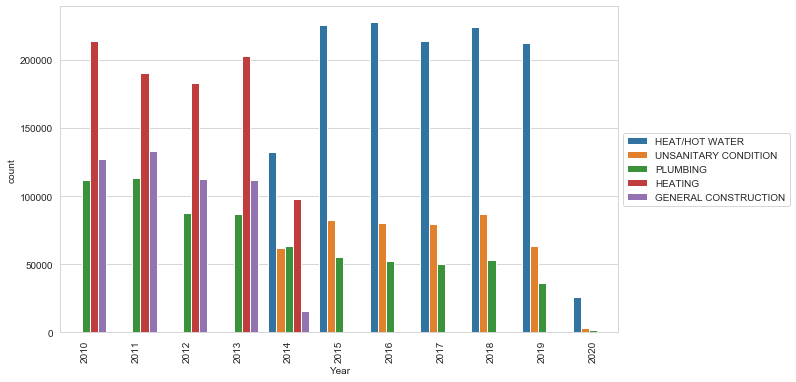

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=df311_top5, hue='Complaint Type')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=90)

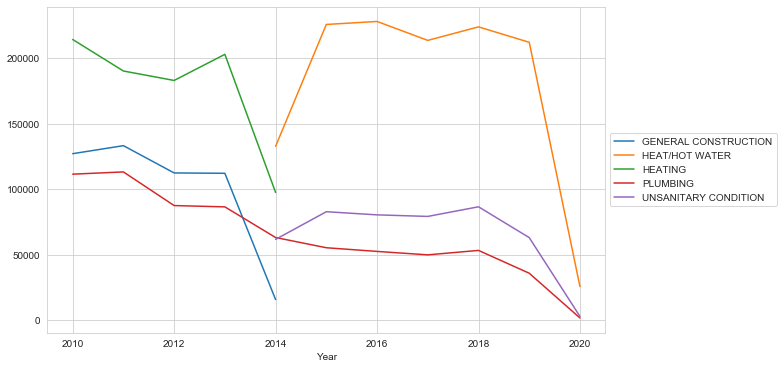

In [19]:
df311_top5_grouped = df311_top5.groupby(['Year','Complaint Type']).count()['Unique Key'].unstack()

fig,ax = plt.subplots(figsize=(10,6))
df311_top5_grouped.plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [20]:
df311_top5_grouped

Complaint Type  GENERAL CONSTRUCTION  HEAT/HOT WATER   HEATING  PLUMBING  \
Year                                                                       
2010                        127131.0             NaN  214218.0  111504.0   
2011                        133242.0             NaN  190184.0  113218.0   
2012                        112436.0             NaN  182974.0   87561.0   
2013                        112169.0             NaN  202896.0   86564.0   
2014                         15885.0        132732.0   97578.0   63190.0   
2015                             NaN        225678.0       NaN   55395.0   
2016                             NaN        227959.0       NaN   52592.0   
2017                             NaN        213521.0       NaN   49969.0   
2018                             NaN        223835.0       NaN   53359.0   
2019                             NaN        212075.0       NaN   35956.0   
2020                             NaN         25774.0       NaN    1833.0   

Complaint Type  UNSANITARY CONDITION  
Year                                  
2010                             NaN  
2011                             NaN  
2012                             NaN  
2013                             NaN  
2014                         61764.0  
2015                         82867.0  
2016                         80469.0  
2017                         79282.0  
2018                         86621.0  
2019                         63122.0  
2020                          3017.0

Definitions changed in 2014. Instead of grouping, will focus on 2015-2020 data 

In [21]:
df311 = df311[df311['Year'] >= 2015]

In [22]:
df311.groupby('Complaint Type').count()['Unique Key'].sort_values()

Complaint Type
MOLD                            1
VACANT APARTMENT                6
AGENCY                          7
OUTSIDE BUILDING             5738
ELEVATOR                     6018
HPD LITERATURE REQUEST      26424
SAFETY                      44495
APPLIANCE                   62371
FLOORING/STAIRS            116310
GENERAL                    124976
ELECTRIC                   129587
WATER LEAK                 164715
DOOR/WINDOW                176366
PLUMBING                   249104
PAINT/PLASTER              282068
UNSANITARY CONDITION       395378
HEAT/HOT WATER            1128842
Name: Unique Key, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

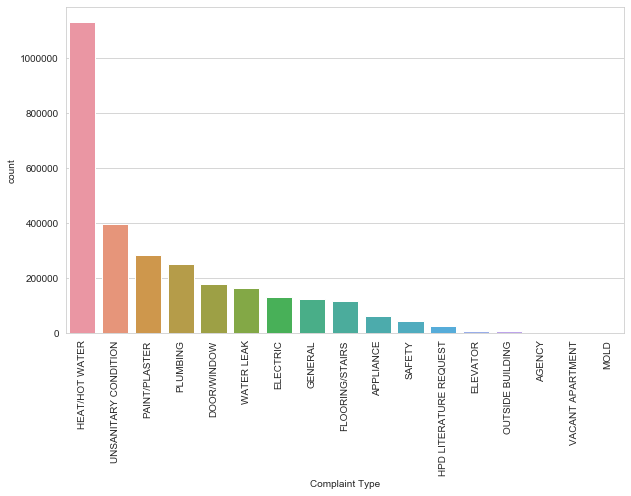

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('Complaint Type', data=df311, order = df311['Complaint Type'].value_counts().index)

plt.xticks(rotation=90)

In [24]:
df311['Resolution Description'].unique()

array(['The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.',
       'The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.',
       "The Department of Housing Preservation and Development conducted or attempted to conduct an inspection.  More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.",
       nan,
       'The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the 

In [25]:
df311_no_dups = df311[~df311['Resolution Description'].str.contains('More than one complaint was received for this building-wide condition', na=False)]

In [26]:
df311_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912395 entries, 0 to 6019842
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            object        
 2   Closed Date             object        
 3   Complaint Type          object        
 4   Location Type           object        
 5   Incident Zip            float64       
 6   Incident Address        object        
 7   Street Name             object        
 8   Address Type            object        
 9   City                    object        
 10  Status                  object        
 11  Resolution Description  object        
 12  Borough                 object        
 13  Latitude                float64       
 14  Longitude               float64       
 15  Created DateTime        datetime64[ns]
 16  Year                    int64         
 17  Month                   int64         
dtypes:

In [27]:
df311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912406 entries, 0 to 6019842
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            object        
 2   Closed Date             object        
 3   Complaint Type          object        
 4   Location Type           object        
 5   Incident Zip            float64       
 6   Incident Address        object        
 7   Street Name             object        
 8   Address Type            object        
 9   City                    object        
 10  Status                  object        
 11  Resolution Description  object        
 12  Borough                 object        
 13  Latitude                float64       
 14  Longitude               float64       
 15  Created DateTime        datetime64[ns]
 16  Year                    int64         
 17  Month                   int64         
dtypes:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

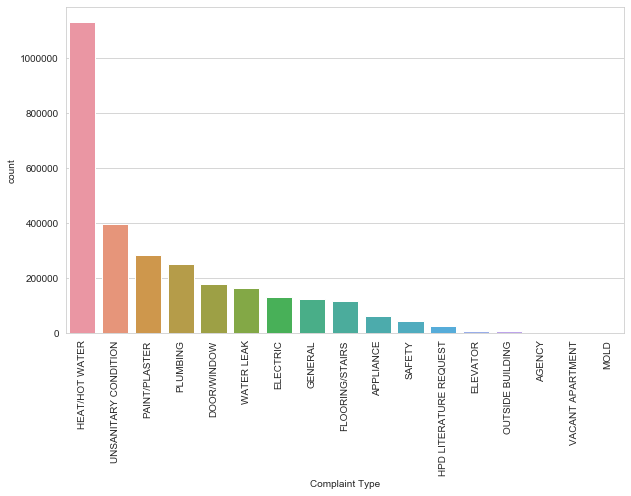

In [28]:
plt.figure(figsize=(10,6))
sns.countplot('Complaint Type', data=df311_no_dups, order = df311['Complaint Type'].value_counts().index)

plt.xticks(rotation=90)

##Question 1 Results:
- Heat/Hot Water most common result

# Question 2: Identify Areas Most Affected by the Top Complaint Type

Begin to analyze just the main complaint: Heat/Hot Water

In [29]:
df311_heat = df311[df311['Complaint Type'] == 'HEAT/HOT WATER']

In [30]:
df311_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128842 entries, 0 to 6019841
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unique Key              1128842 non-null  int64         
 1   Created Date            1128842 non-null  object        
 2   Closed Date             1124243 non-null  object        
 3   Complaint Type          1128842 non-null  object        
 4   Location Type           1128842 non-null  object        
 5   Incident Zip            1121738 non-null  float64       
 6   Incident Address        1128842 non-null  object        
 7   Street Name             1128842 non-null  object        
 8   Address Type            1122054 non-null  object        
 9   City                    1121877 non-null  object        
 10  Status                  1128842 non-null  object        
 11  Resolution Description  1128764 non-null  object        
 12  Borough       

In [31]:
df311_heat.groupby(['Borough']).count()['Unique Key'].sort_values()

Borough
Unspecified           1
STATEN ISLAND     11042
QUEENS           151363
MANHATTAN        255276
BROOKLYN         345225
BRONX            365935
Name: Unique Key, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

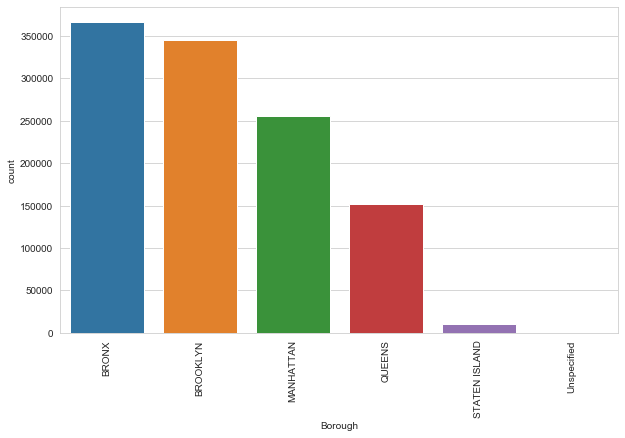

In [32]:
plt.figure(figsize=(10,6))
sns.countplot('Borough', data=df311_heat, order = df311_heat['Borough'].value_counts().index)

plt.xticks(rotation=90)

In [33]:
df311_heat.groupby('Street Name').count()['Unique Key'].sort_values()

Street Name
BRIGHTON    1 COURT        1
BOWLING GREEN PLACE        1
SHORE ROAD LANE            1
KATAN LOOP                 1
BARRY STREET               1
                       ...  
MORRIS AVENUE           8520
OCEAN AVENUE            9193
ELMHURST AVENUE        11217
BROADWAY               13892
GRAND CONCOURSE        19653
Name: Unique Key, Length: 5177, dtype: int64

In [34]:
df311_heat.groupby('Incident Zip').count()['Unique Key'].sort_values()

Incident Zip
12345.0        1
10045.0        1
10103.0        1
10112.0        1
10121.0        1
10129.0        1
10169.0        2
10041.0        3
10020.0        3
10162.0        5
11005.0        7
11109.0       13
10069.0       20
10280.0       26
11040.0       42
10004.0       46
11697.0       47
10005.0       60
11001.0       65
10307.0       81
11362.0       98
10308.0      115
11004.0      131
10282.0      143
10007.0      148
10006.0      156
10309.0      161
10312.0      174
11426.0      194
10044.0      194
10464.0      207
11363.0      252
11360.0      283
11411.0      370
11357.0      382
11366.0      480
10475.0      496
11356.0      523
11370.0      524
11693.0      530
11414.0      570
11428.0      578
11361.0      586
10310.0      662
10305.0      669
11365.0      676
10017.0      724
10302.0      734
11436.0      737
11379.0      739
11429.0      768
10038.0      788
10314.0      879
11358.0      918
11364.0      940
10306.0      994
10018.0     1022
11416.0     1043
1

In [35]:
# id = '1_DQh625gBtLnI5njH8PvQN1Afawe7Uyg'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Borough Boundaries.geojson')  

In [38]:
complaint_locations = df311_heat[['Latitude', 'Longitude']]
locationlist = complaint_locations.values.tolist()
print(len(locationlist))
complaint_locations = complaint_locations.dropna()
locationlist = complaint_locations.values.tolist()
print(len(locationlist))
complaint_locations = complaint_locations.drop_duplicates()
locationlist = complaint_locations.values.tolist()
print(len(locationlist))


1128842
1121738
88433


In [39]:
df311_heat_borough = df311_heat.groupby(['Borough'], as_index=True).count()['Unique Key'].to_frame('Total Complaints').reset_index()
df311_heat_borough = df311_heat_borough[df311_heat_borough['Borough']!='Unspecified']
df311_heat_borough['Borough'] = df311_heat_borough['Borough'].str.title()
df311_heat_borough

Borough  Total Complaints
0          Bronx            365935
1       Brooklyn            345225
2      Manhattan            255276
3         Queens            151363
4  Staten Island             11042

In [40]:
import folium
import folium.plugins as plugins 

# definition of the boundaries in the map
borough_geo = r'Borough Boundaries.geojson'
  
map = folium.Map(location=[40.699305, -73.921027], tiles='cartodbpositron', zoom_start=11)

folium.Choropleth(
    geo_data=borough_geo,
    data=df311_heat_borough,
    columns=['Borough', 'Total Complaints'],
    key_on='feature.properties.boro_name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Complaints'
).add_to(map)

plugins.FastMarkerCluster(locationlist).add_to(map)

map

##Question 2 Results:
- Borough: Bronx
- Street: Grand Concourse
- ZIP: 11226

# Question 3: Identify Relationship between Building Characteristics and Top Complaint Type


##Import the PLUTO data and clean up:
- Drop null over 5% 
- Drop un-needed objects (especially with large nunique)
- Drop irrelevant building data
- Concat df and see what has the greatest p value 

In [125]:
dfPLUTO.head()

Borough  Block  Lot   CD  ...  PLUTOMapID  FIRM07_FLAG  PFIRM15_FLAG  Version
0      BX   2260    1  201  ...           1          NaN           NaN     18V1
1      BX   2260    4  201  ...           1          NaN           NaN     18V1
2      BX   2260   10  201  ...           1          NaN           NaN     18V1
3      BX   2260   17  201  ...           1          NaN           NaN     18V1
4      BX   2260   18  201  ...           1          NaN           NaN     18V1

[5 rows x 87 columns]

In [126]:
dfPLUTO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Borough               89854 non-null  object 
 1   Block                 89854 non-null  int64  
 2   Lot                   89854 non-null  int64  
 3   CD                    89854 non-null  int64  
 4   CT2010                89447 non-null  float64
 5   CB2010                87342 non-null  float64
 6   SchoolDist            89695 non-null  float64
 7   Council               89649 non-null  float64
 8   ZipCode               89525 non-null  float64
 9   FireComp              89568 non-null  object 
 10  PolicePrct            89692 non-null  float64
 11  HealthCenterDistrict  89727 non-null  float64
 12  HealthArea            89630 non-null  float64
 13  SanitBoro             89235 non-null  float64
 14  SanitDistrict         89238 non-null  float64
 15  SanitSub           

In [127]:
dfPLUTO.isna().sum() / len(dfPLUTO) * 100

Borough                   0.000000
Block                     0.000000
Lot                       0.000000
CD                        0.000000
CT2010                    0.452957
CB2010                    2.795646
SchoolDist                0.176954
Council                   0.228148
ZipCode                   0.366150
FireComp                  0.318294
PolicePrct                0.180292
HealthCenterDistrict      0.141340
HealthArea                0.249293
SanitBoro                 0.688895
SanitDistrict             0.685557
SanitSub                  1.185256
Address                   0.076791
ZoneDist1                 0.065662
ZoneDist2                97.158724
ZoneDist3                99.962161
ZoneDist4                99.997774
Overlay1                 90.176286
Overlay2                 99.893160
SPDist1                  94.878358
SPDist2                 100.000000
SPDist3                 100.000000
LtdHeight               100.000000
SplitZone                 0.073452
BldgClass           

In [0]:
# Drop all columns with 20% NaN threshold 
thresh = len(dfPLUTO) * 0.2
dfPLUTO.dropna(thresh = thresh, axis = 1, inplace = True)

In [129]:
for col in dfPLUTO:
    if dfPLUTO[col].dtype == "object":
      print(col, dfPLUTO[col].nunique())

Borough 1
FireComp 60
SanitSub 22
Address 87017
ZoneDist1 66
SplitZone 2
BldgClass 182
OwnerName 77013
Ext 3
IrrLotCode 2
ZoneMap 22
Sanborn 1128
Version 1


In [0]:
# Objects that are not needed (all except for address)
# These are either covered by just taking into account one borough, or have too many unique values to create dummy vars 
dfPLUTO.drop([
  'Borough',
  'FireComp',
  'SanitSub',
  'ZoneDist1',
  'SplitZone',
  'BldgClass',
  'OwnerName',
  'Ext',
  'IrrLotCode',
  'ZoneMap',
  'Sanborn',
  'Version'
  ], axis = 1, inplace = True)

In [131]:
list(dfPLUTO.columns)

['Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'ZipCode',
 'PolicePrct',
 'HealthCenterDistrict',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'Address',
 'LandUse',
 'Easements',
 'LotArea',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'OtherArea',
 'AreaSource',
 'NumBldgs',
 'NumFloors',
 'UnitsRes',
 'UnitsTotal',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'ProxCode',
 'LotType',
 'BsmtCode',
 'AssessLand',
 'AssessTot',
 'ExemptLand',
 'ExemptTot',
 'YearBuilt',
 'YearAlter1',
 'YearAlter2',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'TaxMap',
 'APPBBL',
 'PLUTOMapID']

In [0]:
# Redundant info when combined with the borough or zip/street/address
dfPLUTO.drop([
 'Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'PolicePrct',
 'HealthCenterDistrict',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'Easements',
 'ProxCode',
 'ExemptLand',
 'ExemptTot',
 'YearAlter2',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'TaxMap',
 'APPBBL',
 'PLUTOMapID'], axis = 1, inplace = True)

In [0]:
# Units res redundant with LandUse + UnitsTotal
# Building front and depth redundant with LotArea and BldgArea 
# LandUse and BldgArea redundant with specific areas 
# All FAR's (floor area ratio) redundant with BldgArea / LotArea
dfPLUTO.drop([
 'LandUse',
 'UnitsRes',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'AreaSource',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR'
 ], axis = 1, inplace = True)

In [134]:
dfPLUTO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZipCode     89525 non-null  float64
 1   Address     89785 non-null  object 
 2   LotArea     89854 non-null  int64  
 3   BldgArea    89854 non-null  int64  
 4   ComArea     89854 non-null  int64  
 5   ResArea     89854 non-null  int64  
 6   OfficeArea  89854 non-null  int64  
 7   RetailArea  89854 non-null  int64  
 8   GarageArea  89854 non-null  int64  
 9   StrgeArea   89854 non-null  int64  
 10  FactryArea  89854 non-null  int64  
 11  OtherArea   89854 non-null  int64  
 12  NumBldgs    89854 non-null  int64  
 13  NumFloors   89854 non-null  float64
 14  UnitsTotal  89854 non-null  int64  
 15  LotType     89788 non-null  float64
 16  BsmtCode    89788 non-null  float64
 17  AssessLand  89854 non-null  int64  
 18  AssessTot   89854 non-null  int64  
 19  YearBuilt   89854 non-nul

In [0]:
#Create dummy variable for LotType
lottype_dummies = pd.get_dummies(dfPLUTO['LotType'],drop_first=True)
lottype_dummies.rename(columns = {1.0:'BlockAssemblage', 2.0:'Waterfront',3.0:'Corner', 4.0:'Through', 5.0:'Inside', 6.0:'Interior', 7.0:'Island', 8.0:'Alley', 9:'Submerged'},inplace=True)
dfPLUTO = pd.concat([dfPLUTO,lottype_dummies],axis=1)
dfPLUTO.drop('LotType',axis=1,inplace=True)

In [0]:
#Create dummy variable for BsmtCode
bsmtcode_dummies = pd.get_dummies(dfPLUTO['BsmtCode'],drop_first=True)
bsmtcode_dummies.rename(columns = {0.0:'NoBsmt', 1.0:'FullBsmtAbove',2.0:'FullBsmtBelow', 3.0:'PartialBsmtAbove', 4.0:'PartialBsmtBelow', 5.0:'UnknownBsmt'},inplace=True)
dfPLUTO = pd.concat([dfPLUTO,bsmtcode_dummies],axis=1)
dfPLUTO.drop('BsmtCode',axis=1,inplace=True)

In [137]:
dfPLUTO.head()

ZipCode                 Address  ...  PartialBsmtBelow  UnknownBsmt
0  10454.0  122 BRUCKNER BOULEVARD  ...                 0            0
1  10454.0  126 BRUCKNER BOULEVARD  ...                 0            0
2  10454.0  138 BRUCKNER BOULEVARD  ...                 0            0
3  10454.0  144 BRUCKNER BOULEVARD  ...                 0            0
4  10454.0  148 BRUCKNER BOULEVARD  ...                 0            0

[5 rows x 33 columns]

##Clean up the original df prior to merging with PLUTO df

In [0]:
df311_heat_bx = df311_heat[df311_heat['Borough'] == 'BRONX']

In [139]:
df311_heat_bx.head()

Unique Key            Created Date  ...  Year Month
3     45530329  02/02/2020 12:13:18 PM  ...  2020     2
5     45530344  02/02/2020 07:52:08 AM  ...  2020     2
10    45530349  02/02/2020 05:38:39 AM  ...  2020     2
19    45529362  02/02/2020 01:38:25 PM  ...  2020     2
29    45528454  02/02/2020 10:25:32 PM  ...  2020     2

[5 rows x 18 columns]

In [140]:
df311_heat_bx['Address Type'].unique()

array(['ADDRESS', nan], dtype=object)

In [141]:
df311_heat_bx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365935 entries, 3 to 6019841
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              365935 non-null  int64         
 1   Created Date            365935 non-null  object        
 2   Closed Date             365050 non-null  object        
 3   Complaint Type          365935 non-null  object        
 4   Location Type           365935 non-null  object        
 5   Incident Zip            364052 non-null  float64       
 6   Incident Address        365935 non-null  object        
 7   Street Name             365935 non-null  object        
 8   Address Type            364099 non-null  object        
 9   City                    364052 non-null  object        
 10  Status                  365935 non-null  object        
 11  Resolution Description  365921 non-null  object        
 12  Borough                 36593

In [142]:
list(df311_heat_bx.columns)

['Unique Key',
 'Created Date',
 'Closed Date',
 'Complaint Type',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Address Type',
 'City',
 'Status',
 'Resolution Description',
 'Borough',
 'Latitude',
 'Longitude',
 'Created DateTime',
 'Year',
 'Month']

In [143]:
df311_heat_bx.drop([
 'Unique Key',
 'Created Date',
 'Closed Date',
 'Location Type',
 'Address Type',
 'City',
 'Status',
 'Resolution Description',
 'Borough',
 'Latitude',
 'Longitude',
 'Created DateTime',
 'Year',
 'Month'
  ], axis = 1, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
df311_heat_bx.head()

Complaint Type  Incident Zip          Incident Address          Street Name
3   HEAT/HOT WATER       10458.0   2405 SOUTHERN BOULEVARD   SOUTHERN BOULEVARD
5   HEAT/HOT WATER       10456.0        1131 MORRIS AVENUE        MORRIS AVENUE
10  HEAT/HOT WATER       10459.0         1032 ALDUS STREET         ALDUS STREET
19  HEAT/HOT WATER       10473.0        880 BOYNTON AVENUE       BOYNTON AVENUE
29  HEAT/HOT WATER       10463.0  3110 KINGSBRIDGE TERRACE  KINGSBRIDGE TERRACE

In [145]:
df311_heat_bx.replace('HEAT/HOT WATER', 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [146]:
df311_heat_bx.head()

Complaint Type  Incident Zip          Incident Address          Street Name
3                1       10458.0   2405 SOUTHERN BOULEVARD   SOUTHERN BOULEVARD
5                1       10456.0        1131 MORRIS AVENUE        MORRIS AVENUE
10               1       10459.0         1032 ALDUS STREET         ALDUS STREET
19               1       10473.0        880 BOYNTON AVENUE       BOYNTON AVENUE
29               1       10463.0  3110 KINGSBRIDGE TERRACE  KINGSBRIDGE TERRACE

In [147]:
df311_heat_bx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365935 entries, 3 to 6019841
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Complaint Type    365935 non-null  int64  
 1   Incident Zip      364052 non-null  float64
 2   Incident Address  365935 non-null  object 
 3   Street Name       365935 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.0+ MB


In [148]:
df311_heat_bx.drop_duplicates(subset=['Incident Address'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Merge the Pluto df and original df 

In [0]:
final_311_df = pd.merge(left=df311_heat_bx,right=dfPLUTO,how='right',left_on='Incident Address', right_on='Address')

In [150]:
final_311_df.head()

Complaint Type  Incident Zip  ... PartialBsmtBelow UnknownBsmt
0             1.0       10458.0  ...                0           0
1             1.0       10456.0  ...                0           1
2             1.0       10459.0  ...                0           0
3             1.0       10473.0  ...                0           0
4             1.0       10463.0  ...                0           0

[5 rows x 37 columns]

In [151]:
final_311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89854 entries, 0 to 89853
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Complaint Type    12850 non-null  float64
 1   Incident Zip      12546 non-null  float64
 2   Incident Address  12850 non-null  object 
 3   Street Name       12850 non-null  object 
 4   ZipCode           89525 non-null  float64
 5   Address           89785 non-null  object 
 6   LotArea           89854 non-null  int64  
 7   BldgArea          89854 non-null  int64  
 8   ComArea           89854 non-null  int64  
 9   ResArea           89854 non-null  int64  
 10  OfficeArea        89854 non-null  int64  
 11  RetailArea        89854 non-null  int64  
 12  GarageArea        89854 non-null  int64  
 13  StrgeArea         89854 non-null  int64  
 14  FactryArea        89854 non-null  int64  
 15  OtherArea         89854 non-null  int64  
 16  NumBldgs          89854 non-null  int64 

In [152]:
final_311_df['Complaint Type'].unique()

array([ 1., nan])

In [0]:
final_311_df['Complaint Type'].fillna(0,inplace=True)
final_311_df.rename(columns = {'Complaint Type':'HeatingComplaint'},inplace=True)

In [0]:
final_311_df.drop(['Incident Zip','ZipCode'],axis=1,inplace=True)

In [0]:
final_311_df.drop(['Incident Address','Address','Street Name'],axis=1,inplace=True)

In [0]:
final_311_df = final_311_df[final_311_df['YearBuilt']!=0]

##EDA on merged df

- How balanced is the data
- Correlation

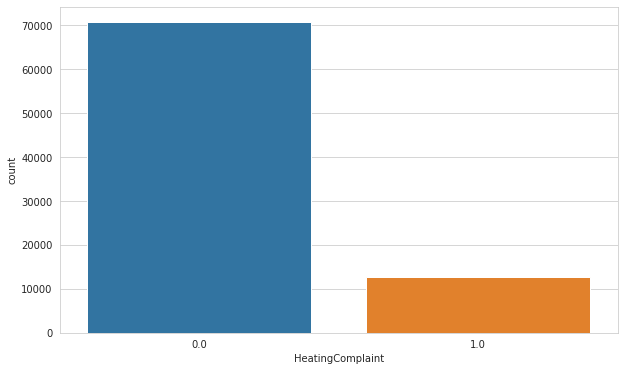

In [157]:
plt.figure(figsize=(10,6))

sns.countplot(x='HeatingComplaint', data = final_311_df)

In [158]:
final_311_df.corr()['HeatingComplaint'].sort_values()

FullBsmtAbove      -0.132687
YearBuilt          -0.099581
FullBsmtBelow      -0.082119
Inside             -0.081339
Waterfront         -0.020444
NumBldgs           -0.016261
FactryArea         -0.014141
StrgeArea          -0.010672
Interior           -0.009104
PartialBsmtBelow   -0.005086
Alley              -0.004415
PartialBsmtAbove   -0.002835
BlockAssemblage    -0.002626
Island             -0.002323
Submerged          -0.002081
GarageArea         -0.000919
LotArea            -0.000754
OtherArea           0.002090
ComArea             0.002142
Through             0.006087
OfficeArea          0.006656
AssessLand          0.009600
RetailArea          0.012465
AssessTot           0.031136
Corner              0.088356
BldgArea            0.093667
UnknownBsmt         0.098928
UnitsTotal          0.102637
ResArea             0.107337
YearAlter1          0.141147
NumFloors           0.396624
HeatingComplaint    1.000000
Name: HeatingComplaint, dtype: float64

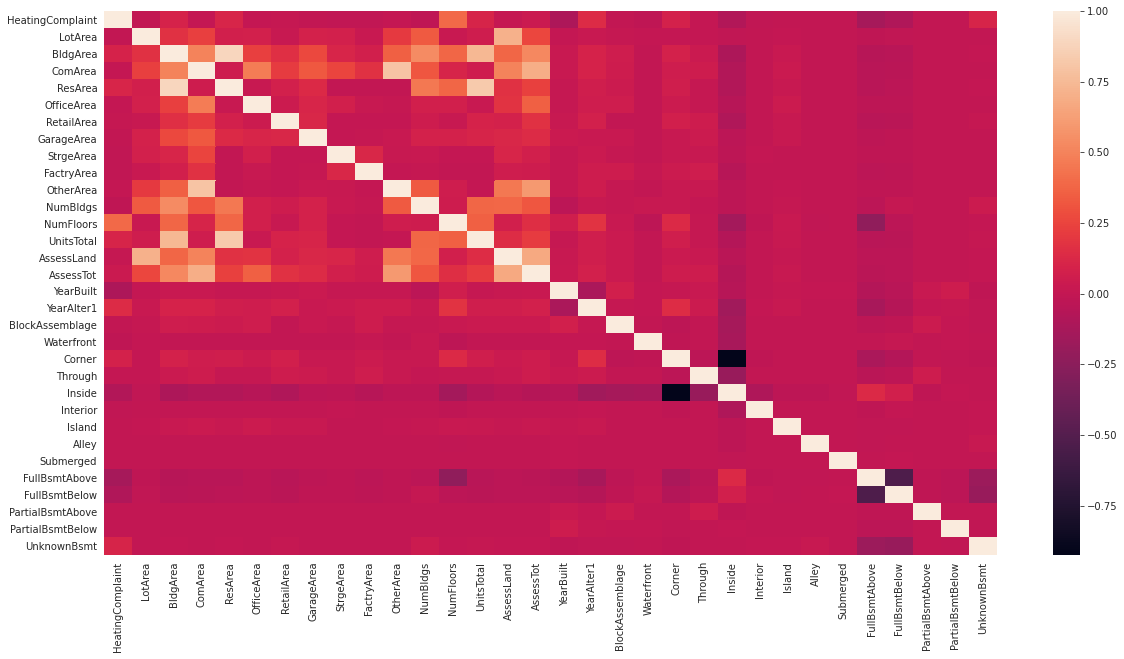

In [159]:
plt.figure(figsize=(20,10))

sns.heatmap(final_311_df.corr(),annot=False)

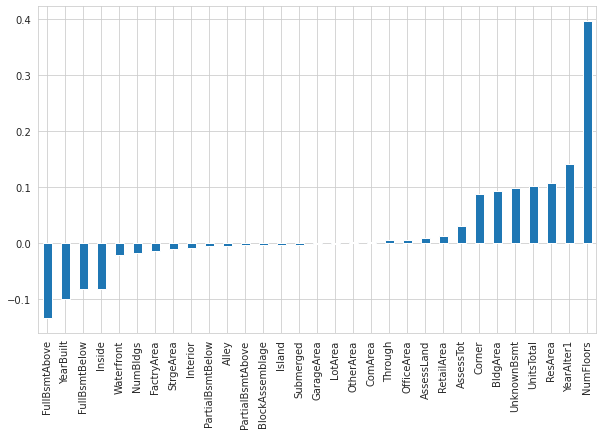

In [160]:
plt.figure(figsize=(10,6))
final_311_df.corr()['HeatingComplaint'].sort_values().drop('HeatingComplaint').plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

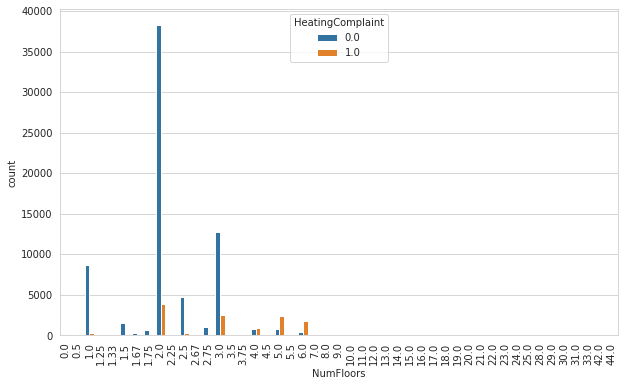

In [161]:
plt.figure(figsize=(10,6))

sns.countplot(x='NumFloors',data=final_311_df,hue='HeatingComplaint')
plt.xticks(rotation=90)

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140]), <a list of 15 Text major ticklabel objects>)

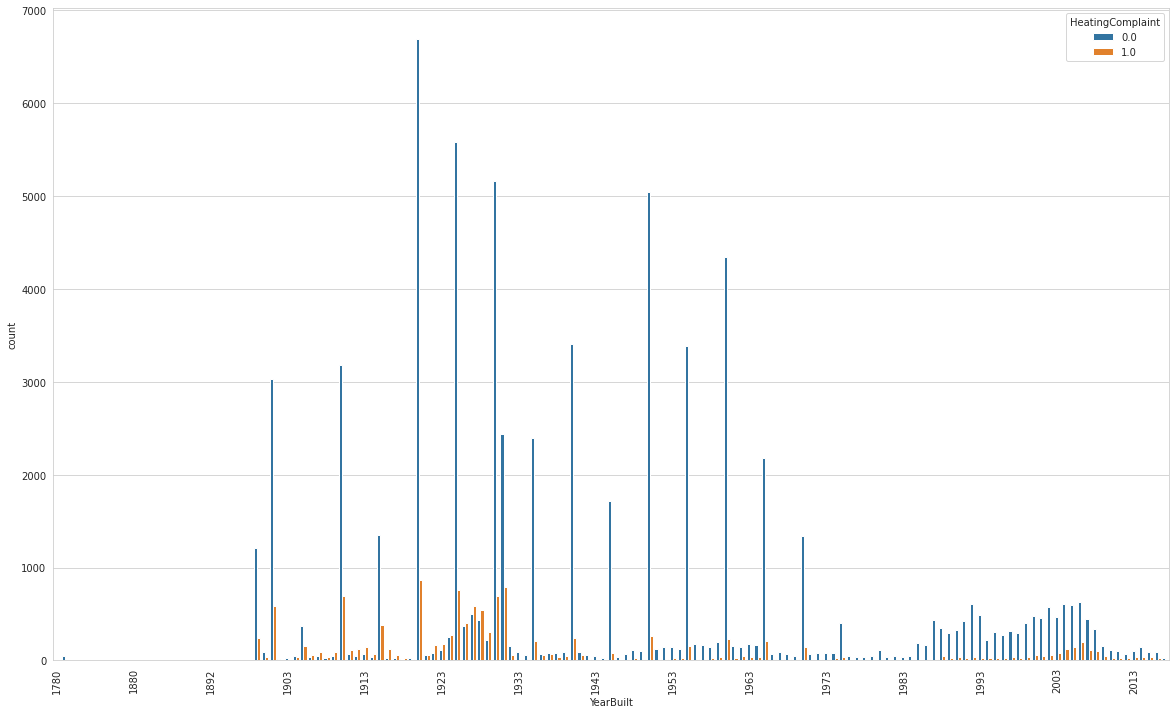

In [162]:
fig = plt.figure(figsize=(20,12))

plot_ = sns.countplot(x='YearBuilt',data=final_311_df,hue='HeatingComplaint')

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.xticks(rotation=90)

(0.0, 1000.0)

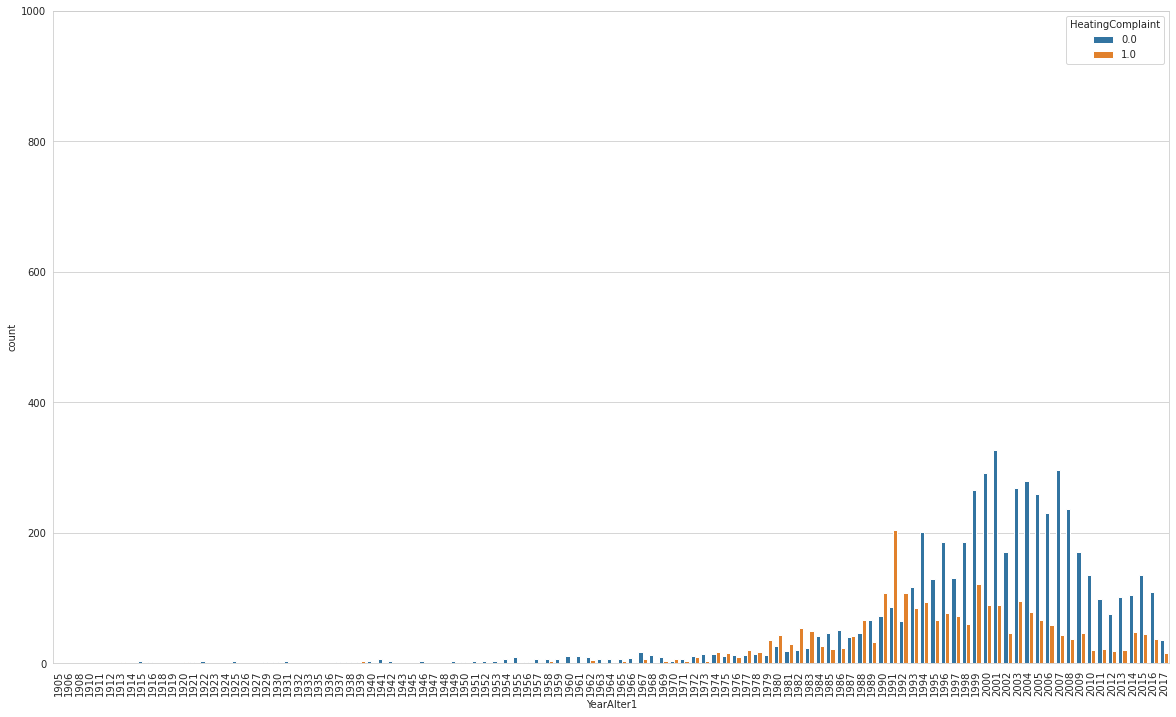

In [163]:
plt.figure(figsize=(20,12))

sns.countplot(x='YearAlter1',data=final_311_df[final_311_df['YearAlter1']!=0],hue='HeatingComplaint')
plt.xticks(rotation=90)
plt.ylim(0,1000)

##Question 3 Results:
The top results for impact on whether a location will have heating complainats are:
- Number of floors
- Having renovations completed
- Residential area 
- Total units
- Area of the building
- If it is on a corner 
- The total cost of the building

These all make sense, as they are an indicator of the amount of tennants that would be in the building. The greater the amount of tennants, the greater the chance is that someone will have an issue at some point. 

In [0]:
final_311_df.to_pickle("final_311_df.pkl")

# Question 4: Predict the Top Complaint Type

##Prediction using Sklearn / logistic regression

In [0]:
X = final_311_df.drop('HeatingComplaint',axis=1)
y = final_311_df['HeatingComplaint']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
complaint_logmodel = LogisticRegression()
complaint_logmodel.fit(X_train,y_train)

In [0]:
predictions = complaint_logmodel.predict(X_test)

In [168]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     21188
         1.0       0.75      0.12      0.21      3859

    accuracy                           0.86     25047
   macro avg       0.81      0.56      0.57     25047
weighted avg       0.84      0.86      0.81     25047

[[21031   157]
 [ 3388   471]]


##Prediction using Keras / Tensorflow

In [0]:
X = final_311_df.drop('HeatingComplaint',axis=1).values
y = final_311_df['HeatingComplaint'].values

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
X_train.shape

(58440, 31)

In [0]:
model = Sequential()

# input layer
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [173]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3875 - val_loss: 0.3453
Epoch 2/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3395 - val_loss: 0.3306
Epoch 3/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3304 - val_loss: 0.3299
Epoch 4/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3288 - val_loss: 0.3261
Epoch 5/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3256 - val_loss: 0.3263
Epoch 6/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3249 - val_loss: 0.3253
Epoch 7/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3230 - val_loss: 0.3250
Epoch 8/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3229 - val_loss: 0.3232
Epoch 9/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.3217 - val_loss: 0.3213
Epoch 10/25
1827/1827 [==============================] - 3s 2ms/step - loss: 0.320

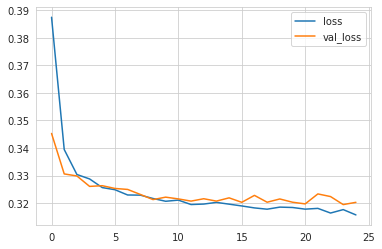

In [174]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [175]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     21188
         1.0       0.77      0.39      0.52      3859

    accuracy                           0.89     25047
   macro avg       0.83      0.68      0.73     25047
weighted avg       0.88      0.89      0.87     25047

[[20740   448]
 [ 2365  1494]]
